In [56]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import pandas as pd
from scipy import stats
import statsmodels.api as sm

## File Input and Data Preparation

In [57]:
excel_file = "Cam_Pop.xlsx"
Cam_Pop = pd.read_excel(excel_file)
Cam_Pop.head()

,Year,Population,Estimation
0,2000,335227.0,N
1,2001,NaN,M
2,2002,NaN,M
3,2003,NaN,M
4,2004,NaN,M


In [58]:
Cam_Pop.tail()

,Year,Population,Estimation
46,2046,NaN,M
47,2047,NaN,M
48,2048,NaN,M
49,2049,NaN,M
50,2050,NaN,M


In [59]:
Cam_Pop['Population Model'] = np.zeros

In [60]:
Cam_Pop.head(n=25)

,Year,Population,Estimation,Population Model
0,2000,335227.0,N,<built-in function zeros>
1,2001,NaN,M,<built-in function zeros>
2,2002,NaN,M,<built-in function zeros>
3,2003,NaN,M,<built-in function zeros>
4,2004,NaN,M,<built-in function zeros>
5,2005,374081.0,Y,<built-in function zeros>
6,2006,387717.0,Y,<built-in function zeros>
7,2007,387210.0,Y,<built-in function zeros>
8,2008,385274.0,Y,<built-in function zeros>
9,2009,396371.0,Y,<built-in function zeros>


## Variable Defining and Linear Regression

In [61]:
#For actual Census Data from 2000-2010, census only happens in 2000 and 2010
Population = Cam_Pop['Population']
Year = Cam_Pop['Year']
Model = Cam_Pop['Population Model']
time = Year - Year[0]

Text(0.5, 0, 'Year')

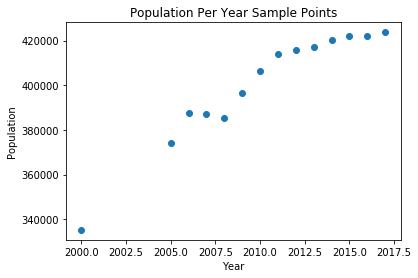

In [62]:
fig, ax = plt.subplots()
ax.scatter(Year, Population)
ax.set_title('Population Per Year Sample Points')
ax.set_ylabel('Population')
ax.set_xlabel('Year')

In [63]:
# set variable for ln(nt/No) vs t
df = np.log(Population/Population[0])
df.head(n=10)

0    0.000000
1         NaN
2         NaN
3         NaN
4         NaN
5    0.109664
6    0.145468
7    0.144159
8    0.139147
9    0.167543
Name: Population, dtype: float64

In [64]:
# get rid of NaN values, Scipy won't work if I don't do this
Y=df[np.logical_not(np.isnan(df))]
X=time[np.logical_not(np.isnan(df))]

In [65]:
# Fitting a line to the k-value
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [66]:
slope, intercept, r_value, p_value, std_err

(0.013053834785732982,
 0.04272980752389344,
 0.9507106144433413,
 1.860771640233833e-07,
 0.001229057699291414)

Text(0, 0.5, 'Ln(N(t)/No)')

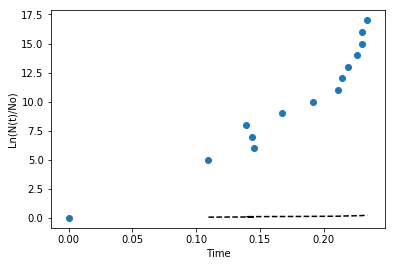

In [67]:
plt.plot(df, slope*time, 'k--')
plt.scatter(df, time)
plt.xlabel('Time')
plt.ylabel('Ln(N(t)/No)')
#plt.xlim((2000,2020))

### Using Statsmodels(way better)

In [68]:
model = sm.OLS(Y,X).fit()
model.summary()

C:\Users\alvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     648.2
Date:                Sun, 14 Apr 2019   Prob (F-statistic):           1.77e-12
Time:                        15:30:50   Log-Likelihood:                 31.113
No. Observations:                  14   AIC:                            -60.23
Df Residuals:                      13   BIC:                            -59.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0165      0.001     25.461      0.000       0.015       0.018
==============================================================================
Omnibus:                        1.661   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.075
Skew:                          -0.653   Prob(JB):                        0.584
Kurtosis:                       2.629   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
predictions = model.predict(time) # make the predictions by the model
predictions

0     0.000000
1     0.016536
2     0.033071
3     0.049607
4     0.066142
5     0.082678
6     0.099213
7     0.115749
8     0.132284
9     0.148820
10    0.165355
11    0.181891
12    0.198426
13    0.214962
14    0.231497
15    0.248033
16    0.264568
17    0.281104
18    0.297639
19    0.314175
20    0.330710
21    0.347246
22    0.363782
23    0.380317
24    0.396853
25    0.413388
26    0.429924
27    0.446459
28    0.462995
29    0.479530
30    0.496066
31    0.512601
32    0.529137
33    0.545672
34    0.562208
35    0.578743
36    0.595279
37    0.611814
38    0.628350
39    0.644885
40    0.661421
41    0.677956
42    0.694492
43    0.711027
44    0.727563
45    0.744099
46    0.760634
47    0.777170
48    0.793705
49    0.810241
50    0.826776
dtype: float64

Text(0, 0.5, 'Ln(N(t)/No)')

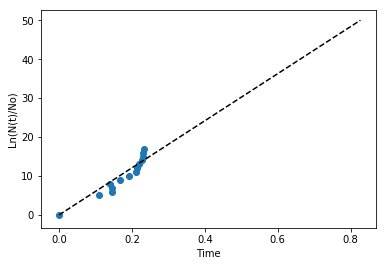

In [77]:
plt.plot(predictions, time, 'k--')
plt.scatter(df, time)
plt.xlabel('Time')
plt.ylabel('Ln(N(t)/No)')

## Population Modeling

In [78]:
Cam_Pop['Population Model'] = np.exp(predictions)*Population[0]
Cam_Pop.head(n=25)
#this gives me my filled in population exponential

,Year,Population,Estimation,Population Model
0,2000,335227.0,N,335227.000000
1,2001,NaN,M,340816.236828
2,2002,NaN,M,346498.662953
3,2003,NaN,M,352275.832119
4,2004,NaN,M,358149.323976
5,2005,374081.0,Y,364120.744511
6,2006,387717.0,Y,370191.726488
7,2007,387210.0,Y,376363.929894
8,2008,385274.0,Y,382639.042394
9,2009,396371.0,Y,389018.779789


Text(0.5, 0, 'Time')

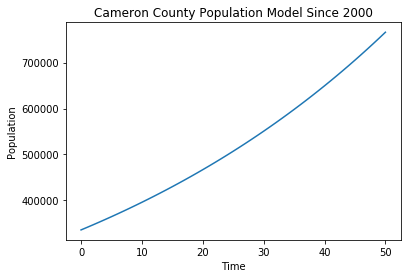

In [88]:
fig, ax = plt.subplots()
plt.plot(time, Cam_Pop['Population Model'])
ax.set_title('Cameron County Population Model Since 2000')
ax.set_ylabel('Population')
ax.set_xlabel('Time')

## Raster Pixel Change Analysis
POA : Raster cell data is array like and can be converted to a numpy array. Boolean testing function to see which cell values have changed and to what. Make a model to make predictions if about cells converted to urban areas. Further step... predict which how many forest pixels in specific will change.